In [ ]:
#Print the shape

import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp

df=pd.read_csv('olympics.csv')
print(df.shape)

(271116, 17)


In [ ]:
#Describe the Age column

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics.csv')
print(olympics['Age'].describe())

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64


In [ ]:
#Print numeric datatypes

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt

df = pd.read_csv('olympics.csv')
[i for i in df.columns if is_numeric_dtype(df[i])]


Age - 9474
Height - 60171
Weight - 62875
Medal - 231333
region - 370
notes - 266077


In [ ]:
#Null values

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics.csv')

for x,y in zip(olympics.isnull().sum().index,olympics.isnull().sum().values):
    if y!=0:
        print(x,"-",y)
        
#another approach
x = olympics.isnull().sum()
for i in range(len(x)):
    if x.values[i] != 0:
        print(x.index[i],"-",x.values[i])

Age - 9474
Height - 60171
Weight - 62875
Medal - 231333
region - 370
notes - 266077
Age - 9474
Height - 60171
Weight - 62875
Medal - 231333
region - 370
notes - 266077


In [ ]:
#Handling Missing Values

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

df = pd.read_csv('olympics.csv')

df.drop(columns=["notes", "Height", "Weight"], inplace=True)
df = df[pd.notnull(df['region'])]
df.Medal = df.Medal.fillna('DNW')

x=df.Medal.value_counts()
print(x)

DNW       230972
Gold       13371
Bronze     13291
Silver     13112
Name: Medal, dtype: int64


In [ ]:
#Handling Missing Values Using Mean

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympic = pd.read_csv('olympics.csv')

##########################################
##### Missing Values handled till now ####
olympic.drop(columns=["notes", "Height", "Weight"], inplace=True)

olympic = olympic[pd.notnull(olympic['region'])]

olympic['Medal'].fillna('DNW', inplace = True)
olympic["Age"].fillna(olympic.groupby("Sport")['Age'].transform('mean'),inplace=True)
print(round(olympic["Age"].mean()))

26


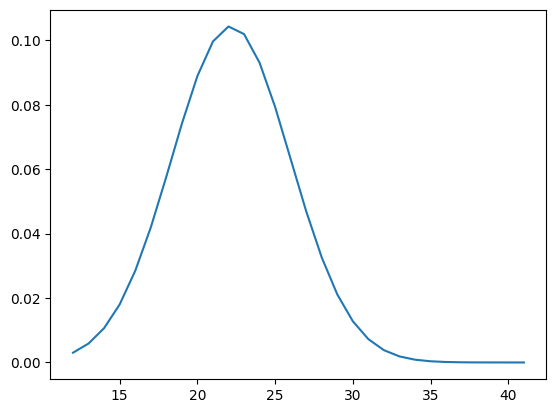

20 to 25


In [ ]:
#Probability Distribution of Age

from scipy.stats import norm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics.csv')

swimming_age = olympics.loc[(olympics["Sport"] == "Swimming") & (olympics["Year"] >= 2000) &
(olympics["Year"] <= 2016)]["Age"]
swimming_age = sorted(swimming_age)

mean_swimming_age = np.mean(swimming_age)
std_swimming_age = np.std(swimming_age)

probability_pdf = norm.pdf(swimming_age, loc=mean_swimming_age, scale=std_swimming_age)

plt.plot(swimming_age, probability_pdf)
plt.show()

print("20 to 25")

In [ ]:
olympics

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [ ]:
#Find Skewness
import scipy.stats as stats
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics.csv')

olympics.rename(columns = {'region':'Country'}, inplace = True)
india_medals = olympics.loc[(olympics["Country"] == "India") & (olympics["Medal"] == "Gold")]
gold_count = india_medals.groupby("Year")["Medal"].value_counts()
if stats.skew(gold_count, bias=False) > 0:
    print("Right Skewed")
else:
    print("Left Skewed")

Left Skewed


In [ ]:
#Standard Deviation of Gold Medals

import statistics 
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import matplotlib.pyplot as plt 
olympics = pd.read_csv('olympics.csv') 

london_medals_host = olympics.loc[(olympics["City"] == "London") & (olympics["region"] == "UK") & (olympics["Medal"] == "Gold")] 
gold_count_host = london_medals_host.groupby("Year")["Medal"].value_counts() 

london_medals_non_host = olympics.loc[(olympics["City"] != "London") & (olympics["region"] == "UK") & (olympics["Medal"] == "Gold")] 
gold_count_non_host = london_medals_non_host.groupby("Year")["Medal"].value_counts()

host_stdev = statistics.stdev(gold_count_host) 
non_host_stdev = statistics.stdev(gold_count_non_host)

print(host_stdev) 
print(non_host_stdev)

71.97453253292676
18.14528124684469


In [ ]:
import numpy as np
data = np.loadtxt(“data.csv”,delimeter=”,”)
X = data[:,0]
Y = data[:,1]

SyntaxError: ignored

In [ ]:
#Standardize the Data

import statistics
import scipy.stats as st
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

df = pd.read_csv('olympics.csv')
m=df["Age"].mean()
st=df["Age"].std()
df["Age"]=( df["Age"] - m )/st
print("0")
print("1")

0
1


In [ ]:
#Correlation analysis


import statistics

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics.csv')
a=pd.DataFrame(abs(olympics.corr()['Age']).sort_values(ascending = False))
print(a)

             Age
Age     1.000000
Weight  0.212069
Height  0.138246
Year    0.115137
ID      0.003631


In [ ]:
#Calculate IQR

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics.csv')
Q1 = np.percentile(olympics["Age"]._get_numeric_data().dropna(), 25, interpolation = 'midpoint')
Q3 = np.percentile(olympics["Age"]._get_numeric_data().dropna(), 75, interpolation = 'midpoint')
# Interquaritle range (IQR)
IQR = Q3 - Q1
print(IQR)

7.0


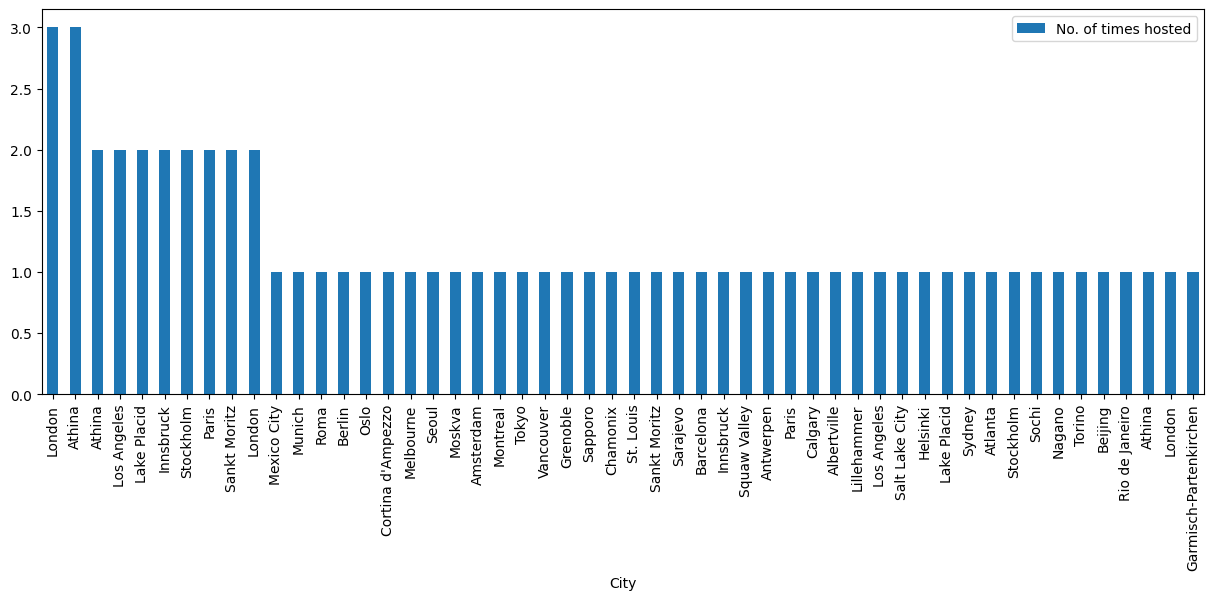

42


In [ ]:
#Summer olympics hosted

import numpy as np 
# linear algebra 
import pandas as pd 
# data processing, CSV file I/O (e.g. pd.read_csv) 
import matplotlib.pyplot as plt 
olympics = pd.read_csv('olympics.csv') 
data = [] 
for city in olympics['City'].unique(): 
    host_count = 0 
    for year in olympics['Year'].unique(): 
        if len(olympics[(olympics['City'] == city) & (olympics['Year'] == year)]) > 0: 
            host_count += 1 
            data.append([city, host_count]) 
plot_data = pd.DataFrame(data,columns = ['City','No. of times hosted']).sort_values(by='No. of times hosted', ascending = False) 
plot_data.plot(x = 'City', y = 'No. of times hosted', kind = 'bar', figsize = (15,5)) 
plt.show() 
Total_cities = len(olympics['City'].unique()) 
print(Total_cities)

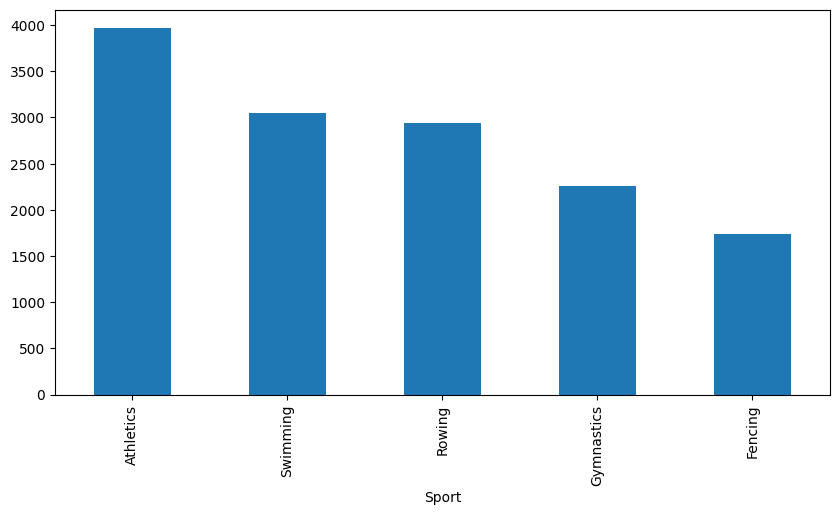

Athletics


In [ ]:
#Most number of medals

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
olympics = pd.read_csv('olympics.csv')
olympics.groupby('Sport').count()['Medal'].sort_values(ascending = False).head().plot.bar(figsize=(10, 5))
plt.show()
print("Athletics")

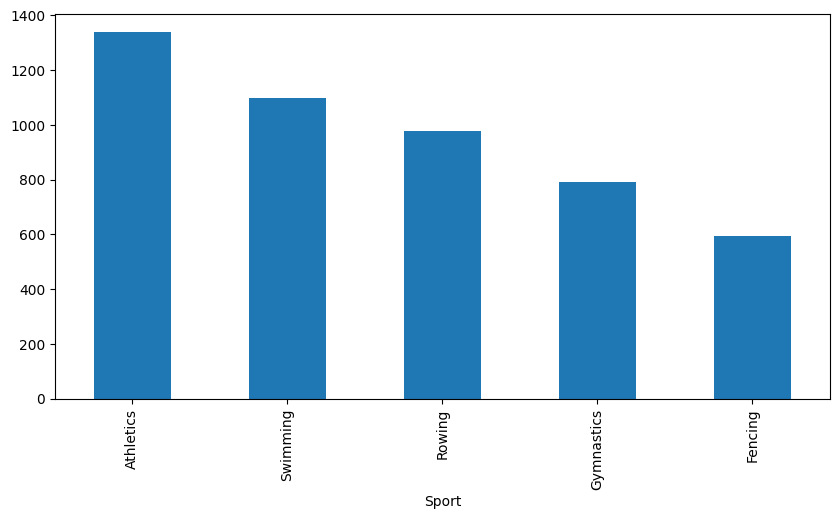

Athletics


In [ ]:
#Most number of gold medals

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
olympics = pd.read_csv('olympics.csv')

medals_host = olympics.loc[(olympics["Medal"] == "Gold")]
medals_host.groupby('Sport').count()['Medal'].sort_values(ascending = False).head().plot.bar(figsize=(10, 5))
plt.show()
print("Athletics")

In [ ]:
#Indias First Gold

import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
olympics = pd.read_csv('olympics.csv') 
gold = olympics[olympics['Medal'] == 'Gold'] 
print(gold[gold['region'] == 'India']['Year'].min())

1924


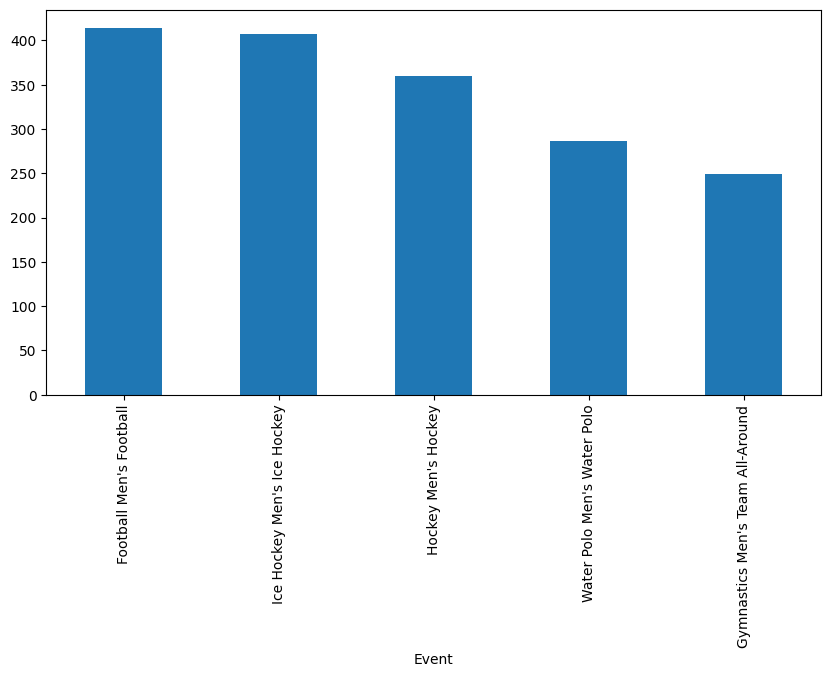

In [ ]:
#Most Popular Event

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
olympics = pd.read_csv('olympics.csv')


medals_host.groupby('Event').count()['Sport'].sort_values(ascending = False).head().plot.bar(figsize=(10, 5))
plt.show()

print("Football Men's Footballs")

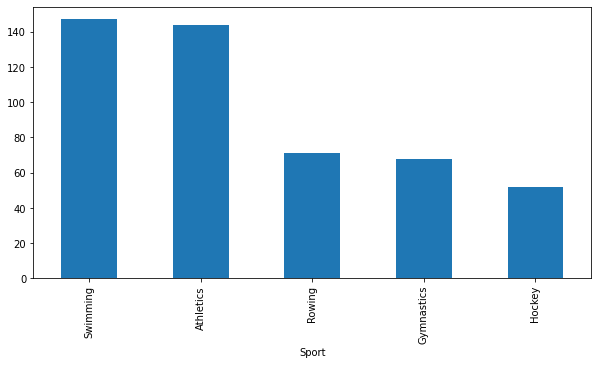

Athletics


In [ ]:
#Most Female Gold Medalists


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
olympics = pd.read_csv('olympics.csv')

medals_host = olympics.loc[(olympics["Medal"] == "Gold")&(olympics["Sex"] == "F")]
medals_host.groupby('Sport').count()['Medal'].sort_values(ascending = False).head().plot.bar(figsize=(10, 5))
plt.show()
print("Athletics")